# JSON-LD Foundation

## Introduction
JSON-LD is a way of encoding Linked Data in JSON, the popular data interchange
format used by many web APIs. Linked Data is a method of representing information
on the web in a way that allows it to be linked and interconnected with other data.
This allows data from different sources to be connected and used together in new
and powerful ways. JSON-LD uses a standardized syntax to represent Linked Data,
making it easier to integrate with other systems and tools. It is often used to
add structured data to web pages, making it easier for search engines and other
applications to understand and process the information on the page.

This document provide a very brief introduction to the JSON-LD serialization format.  
The [JSON-LD](https://json-ld.org) website has some detailed material and videos in
their [documentation section](https://json-ld.org/learn.html).

The material here is just a brief introduction.   For this page we will be using
a simplified version of a CreativeWork document. All the types used by OIH are defined
by Schema.org types.  In this case it is [CreativeWork](https://schema.org/CreativeWork).

At the Schema.org site you will find extensive details on what the various types mean and 
the full range of their properties. For OIH we are defining only a few of these properties 
as of interest in the [Thematic section](../thematics/README.md).  You are free to use additional 
properties to describe your resources.  It will not cause any issues, however, the OIH interfaces
may not leverage them.  However, if you feel others would, or you use them yourself, it's encouraged
to add them.  

We will use the following simple JSON-LD document to show the various features of the format. 

```{literalinclude} ./graphs/simple.json
:linenos:
```

Fontconfig error: "/etc/fonts/conf.d/30-0-google-crosextra-caladea-fonts.conf", line 1: Extra content at the end of the document

Fontconfig error: "/etc/fonts/conf.d/60-open-sans.conf", line 1: Extra content at the end of the document

Fontconfig error: "/etc/fonts/conf.d/62-google-crosextra-caladea-fonts.conf", line 1: Extra content at the end of the document



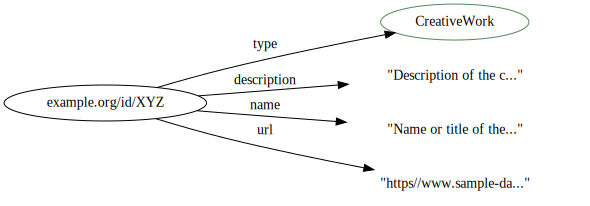

In [1]:
import json
from pyld import jsonld
import os, sys

currentdir = os.path.dirname(os.path.abspath(''))
sys.path.insert(0, currentdir)
from lib import jbutils
with open("./graphs/simple.json") as dgraph:
    doc = json.load(dgraph)

context = {
    "@vocab": "https://schema.org/",
}

compacted = jsonld.compact(doc, context)
jbutils.show_graph(compacted)

```{note}
A small note on nomenclature. In Schema.org, as in ontologies, the class or type
names of Things will be uppercase.  So, for example, in the above JSON-LD data graph,
this is describing a resource of type `CreativeWork`.   So the type CreativeWork will
start with an uppercase letter.  The property `name` is a property of the type and 
properties like this will be lowercase. 
```



## The Context

The context is where the terms used in a document are connected to definitions and identifiers for them.
If you wish to dive into the details of the context check out the
[W3 JSON-LD 1.1 Recommendations Context section](https://www.w3.org/TR/json-ld/#the-context).

The context part of this document is highlighted below. 




```{literalinclude} ./graphs/simple.json
:emphasize-lines: 2-4
:linenos:
```


```{note}
This @context section will be the same for all
the documents described in OIH documentation with the exception of the spatial patterns.  
```


As justed noted, for the spatial patterns we add in the OGC context 
to all us to use terms from that vocabulary.
Below we can see the addition of the geosparql context in line 4 and the use of the vocabulary, using the defined geosparql: prefix in lines 9, 11 and 15.

If we wanted to use other vocabularies like DCAT or FOAF, we would add them to the context with a 
prefix and then the vocabulary namespace.  We could then use terms from that vocabulary in our document
following the same prefix:term pattern.


```{literalinclude} ../thematics/spatial/graphs/geosparqlsimple.json
:emphasize-lines: 4, 9, 11, 15
:linenos:
```


## Graph

The next section we will discuss is the graph part of the document seen in lines 5-9 below.  This is where the properties and 
values of our resource are described.  


```{literalinclude} ./graphs/simple.json
:emphasize-lines: 5-9
:linenos:
```

First though, let's visit a couple special properties in our 
document.  

### Node identifiers (@id)

```{literalinclude} ./graphs/simple.json
:emphasize-lines: 6
:linenos:
```

The first special property is the @id property.  This is the identifier for the top level node in the
graph and is typically the identifier for the record.  

```{note}
It should be noted this is the not the ID for the object being described but rather the record itself.
If you are describing a dataset with a DOI, for example, the @id is not that DOI.  Rather it is the 
ID, potentially the URL, for the metadata record about that dataset.  Your dataset ID would be included
in the metadata record using the the identifier property. 
```

It's good practice to ensure all your records have an @id property.  If there is no value then the 
resource is identified by what is known as a blank node.  Such identifiers do not allowing use in 
a Linked Open Data approach and are generally not recommended.  

The @id should be the URL for the metadata record itself.  Not the HTML page the record is in.  However, 
these might be the same if use use content negotiation to select between HTML and JSON-LD representations
of the record.

### Type identifiers (@type)

```{literalinclude} ./graphs/simple.json
:emphasize-lines: 5
:linenos:
```

The next property to focus on is the @type property.  This describes the type of record we are describing. 


```{note}
In Schema.org and in most vocabularies, types will be named with a capitol letter.  Properties on these
types will be all lower case.  So, CreateWork, as a type, starts with a upper case C.  Then, name, as 
a property on the CreateWork type, starts with a lower case n.  
```

For OIH these type for the various thematic profiles are defined in the documentation for the types.  


### Other properties

At this point we can return to look at the other properties for our type.  

```{literalinclude} ./graphs/simple.json
:emphasize-lines: 7-9
:linenos:
```

As noted, we are using Schema.org type for OIH.  In this case, as mentioned,
this is type  [CreativeWork](https://schema.org/CreativeWork).  So any of the properties 
seen at the Schema.org site can be used.   The key properties of value to the OIH implementation can then 
be found, for this type, in the [Documents thematic type](../thematics/docs/README.md).

For the OIH implementation, we will use the following properties as core properties we 
want all OIH documents to have.  These include:

> name:  The name of the document or item being described
> 
> description:  A description of the document or item being described
> 
> url: A URL for the document or item being described. 


### Domain and range

The domain of a property identifies the type of object it can be applied to.  
So if the domain of a property like [schema.org/knowsAbout](https://schema.org/knowsAbout)
is Person and Organization.  Then that property can only be used on those types.
For example, it would not be correct to use knowsAbout on a resource of type Dataset.

The range of a property identifies the type of object the property can point to.  In 
the case of knowAbout, we see its range as Text, Thing or URL.  This means the property 
can point to a Text, Thing or URL object.  

In schema.org, the domain will be identified as "Used on these types", and the 
range will be identified as "Values expected to be one of these types".  You can see
this at the [schema.org/knowsAbout](https://schema.org/knowsAbout) page.

### Thing and DataType

The [Thing](https://schema.org/Thing) and [Datatype](https://schema.org/DataType) types 
are two special types we should mention.  Thing is the upper level and most generic
type in schema.org.   Everything in schema.org is descended from Thing.  So when
knowsAbout says its range includes Thing, it means you can use any type in schema.org
as the value of that property.

DataType is the basic data type Thing in schema.org and is a subclass of rdfs:Class.
A DataType includes things like Integers, Strings, DateTime, etc.  So, using again
knowsAbout, we see the range includes not only Thing by also the DataTypes Text 
and URL, where URL is actually a sub-type of Text.